In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'plotly'

This work will entail developing a model capable of detecting fraud or, more specifically, fraudulent credit card transactions.
The dataset used was obtained from Kaggle.
This topic seemed quite interesting to us because it is about a very serious subject because it involves money, and often a lot of money, and we believe that if we can get a very good model, it will be useful for some future work, such as in an electronic system that requires transactions, it will be useful to have such a system that helps to indicate whether the transaction you are attempting to make is true or not.

In [2]:
data=pd.read_csv("creditcard.csv")

In [10]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
data.isnull().sum().max() #SHOULD BE 0  To ensure there are no null values

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
cols = [ 'V'+str(i+1) for i in range(28) ] + ['Amount']

X = data[cols]
y = data['Class']

m = len(y)

The dataset has 29 features and only one output, which is a 0/1 indicating whether the feature is not fraudulent or fraudulent.
Only one of the features has a readable title, "Amount," while the remaining features range from V1 to V28 for the users who provided the data's privacy and security, and this data is also somewhat standardized.

Text(0.5, 1.0, 'Not fraudulent vs fraudulent cases')

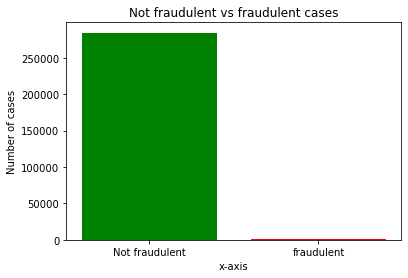

In [70]:
len_fraud=y.value_counts()[1]
len_normal=y.value_counts()[0]
y_label=[len_normal,len_fraud]
tick_label=["Not fraudulent", "fraudulent"]
plt.bar([0,1],y_label,tick_label=tick_label,color=['green', 'red'])

plt.xlabel("x-axis")
plt.ylabel("Number of cases")
plt.title("Not fraudulent vs fraudulent cases")

Observing the graph above, we can see that the fraudulent cases are completely outweighed by the non-fraudulent ones, resulting in the percentages that:

In [53]:
print ("Fraud = ", round(len_fraud/(len_fraud+len_normal)*100,2) , "%")
print ("Non Fraud = ", round(len_normal/(len_fraud+len_normal)*100,2) ,"%")

Fraud =  0.17 %
Non Fraud =  99.83 %


This data still needs to be normalized, and what has been done in the cell below is a data normalization and need to by sub-Sample the dataset.
Normalization is necessary because there are some features that have much higher values ​​than other features and so these features would influence the result more than other features when our goal is for all features to have a minimally similar weight
Doing a sub-sample of the dataset is also necessary since the percent of frauds is too low, this would make our classifier end up assigning almost everything as non-fraudulent even if it was fraudulent like this when trying to put the dataset 50 percent 50 in fraudulent vs non-fraudulent will help a lot in the effectiveness of the classifier and also to be able to understand which features are the ones that indicate more fraud.

In [4]:
sc_X=StandardScaler()
sc_X.fit(X)  #Fit the scaller ONLY to the TRAINING DATA
X=sc_X.transform(X) #Transform the training data
X = pd.DataFrame(X, columns = cols)

In [56]:
normal = (y==0)
fraud = (y==1)

size = X[fraud].shape[0]

X['Class'] = y

normal_transactions = X[normal]
normal_transactions = normal_transactions.sample(frac=1)
normal_transactions = normal_transactions[:size]

fraud_transactions = X[fraud][:size]

Text(0.5, 1.0, 'Not fraudulent vs fraudulent cases')

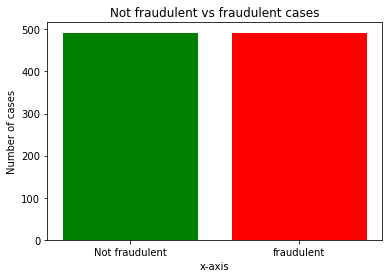

In [69]:

len_fraud=len(normal_transactions)
len_normal=len(fraud_transactions)
y_label=[len_normal,len_fraud]
tick_label=["Not fraudulent", "fraudulent"]
plt.bar([0,1],y_label,tick_label=tick_label,color=['green', 'red'])

plt.xlabel("x-axis")
plt.ylabel("Number of cases")
plt.title("Not fraudulent vs fraudulent cases")

As you can see, the new dataset has been distributed, so we can now analyze the features to see which ones have more weight and also to ensure that our classifier does not misclassify a new case.

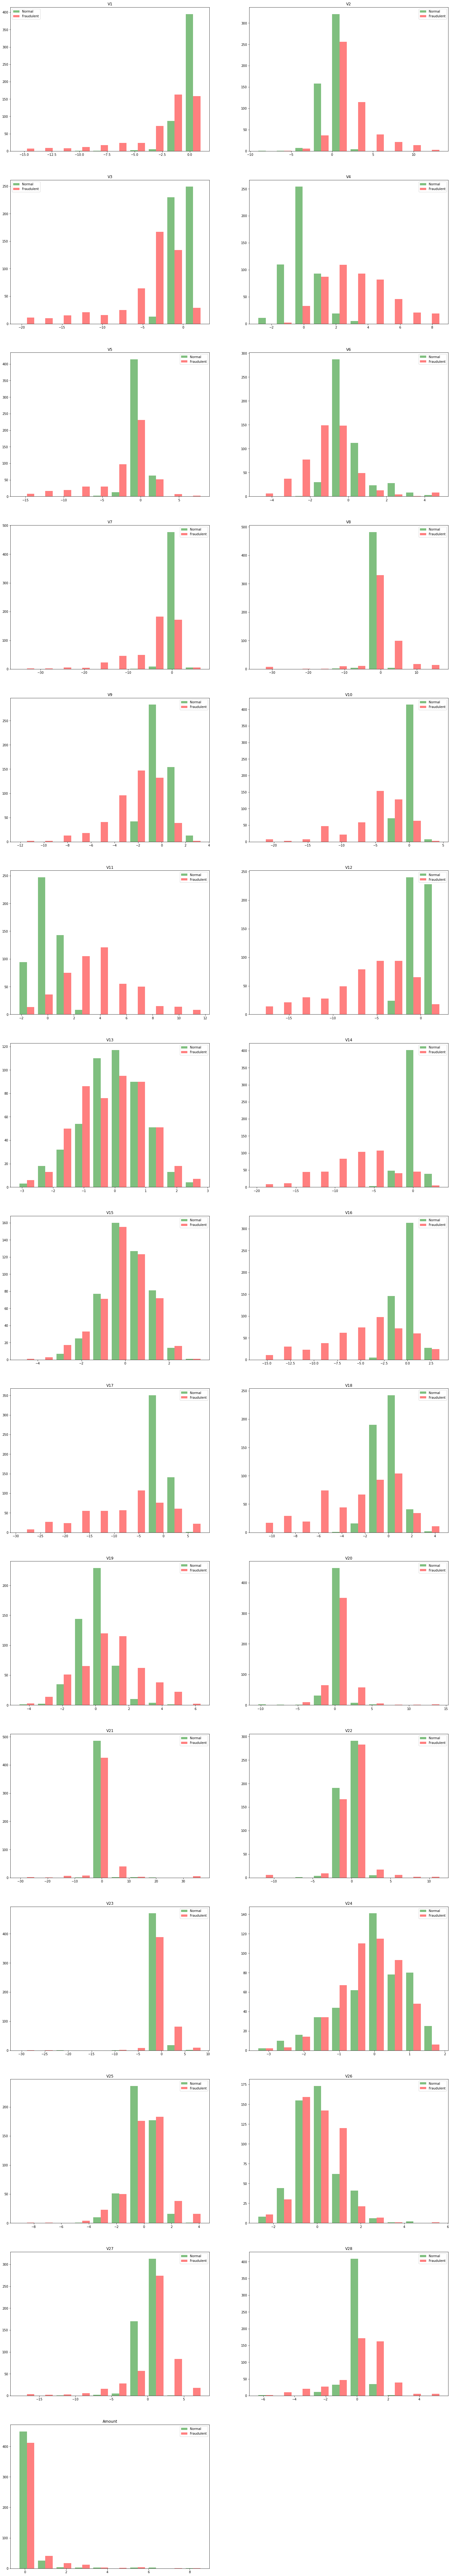

In [30]:
plt.figure(1, figsize=(25, 150))

for i in range(len(cols)):
    plt.subplot(15, 2, i+1)
    feature = cols[i]
    plt.hist([normal_transactions[feature], fraud_transactions[feature]], 10, color=['green', 'red'], alpha=0.5, label=["Normal", "Fraudulent"])
    plt.legend()
    plt.title(feature)
    
plt.show()

By analyzing the behavior of bar charts, we can get a sense of which features and values of a bar chart change more from a normal transaction to a fraudulent one; this can be very useful in understanding which features are more indicative of a fraud.
These are the features:V2,V3,V4,V5,V10,V11,V12,V14,V16,V17,V18,V19

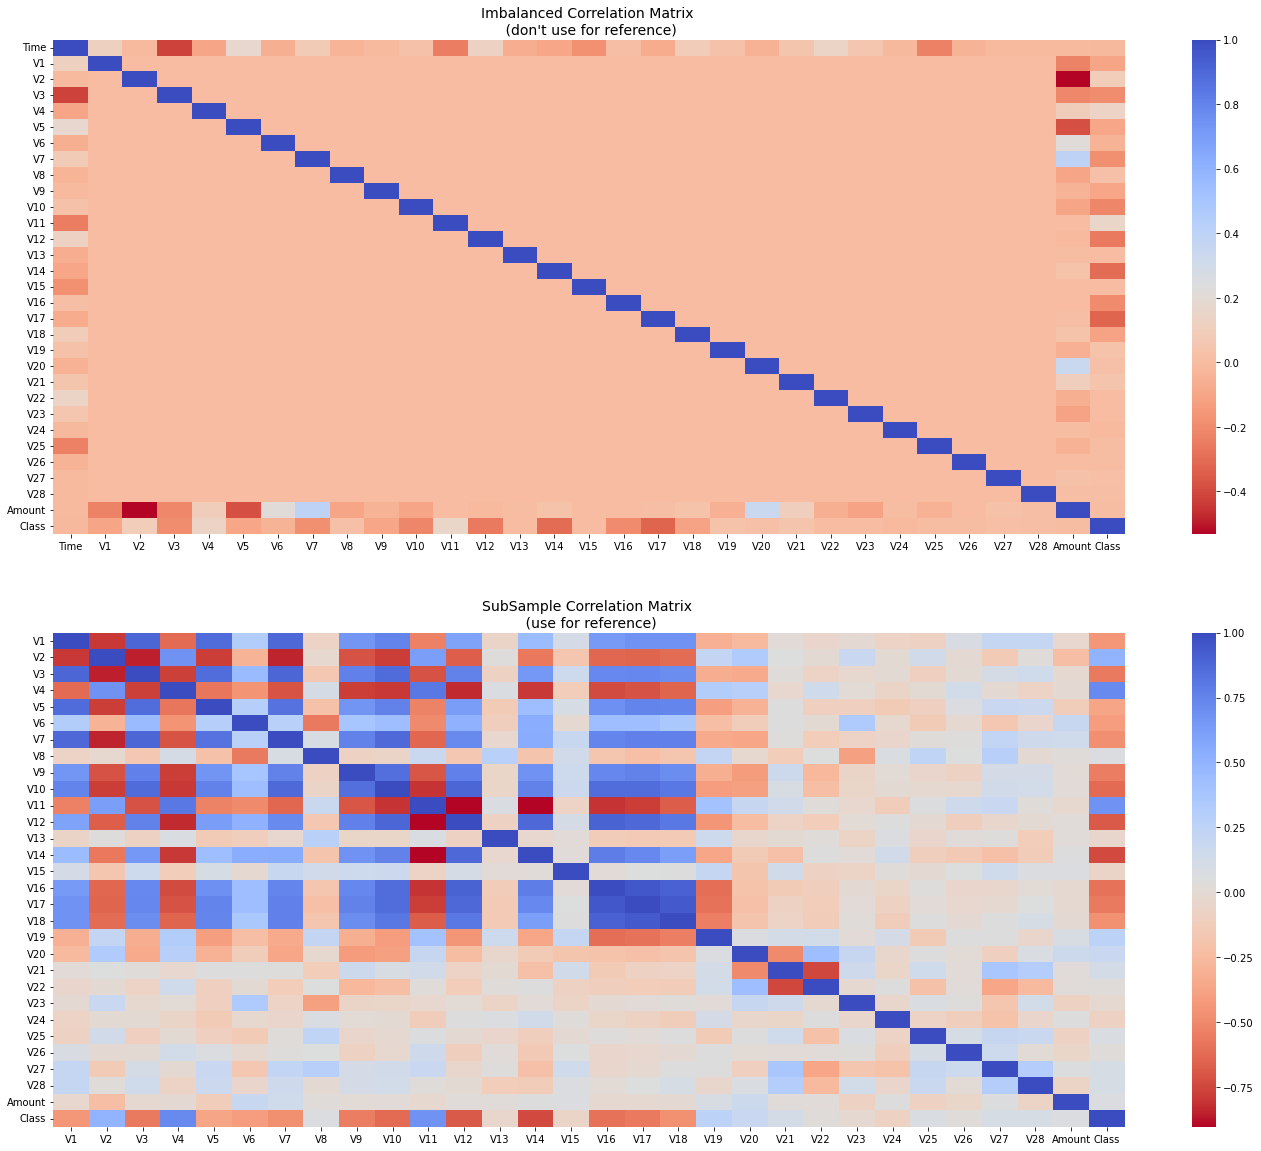

In [31]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = pd.concat([normal_transactions, fraud_transactions]).corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Observing the correlation matrix of the original data, in the line of the Class, which is this line that we have to see which features have more weight on it, it is very difficult to conclude which features have more weight on, or better, just the ones negative are those that are easily visible as having the greatest weight.
We can easily conclude not only the negatives but also the positives based on the subSample.
But what are you hoping to achieve with this correlation matrix? Its purpose is to determine which features are closer to the extremes, from which we can conclude which features most easily tell us whether a transaction is fraudulent or not.<br>
The features that are closer to blue have a positive correlation, indicating that the higher the value of this feature, the more likely it is to be a fraudulent transaction, and these are the features: V2, V4, V11, and V19
The features that are closer to red have a negative correlation, indicating that the lower this value is, the more likely the transaction is to be fraudulent, and they are as follows: V10, V12, V14, V16, and V17 are a few examples.

In conclusion, the features that were identified in both cases as the greatest indicators of fraud were:V2,V4,V10,V11,V12,V14,V16,V17,V19

Now let's analyze the boxplots of these features that were considered most important to study.<br>
A boxplot is a standard way of representing the distribution of data based on 5 numbers:Q1( first quadril), minimin, median,Q3 ( third quadril) and maximum <br>
With this we can see the outliners we have and what their values are. We can also see how symmetric the data is or how they are grouped together and how our data is skewed
A boxplot is a plot that shows how the values in the data are spread. While box plots may appear unsophisticated when compared to a histogram or density plot, they have the advantage of taking up less area, which is beneficial for comparing distributions over numerous groups or sets of data.

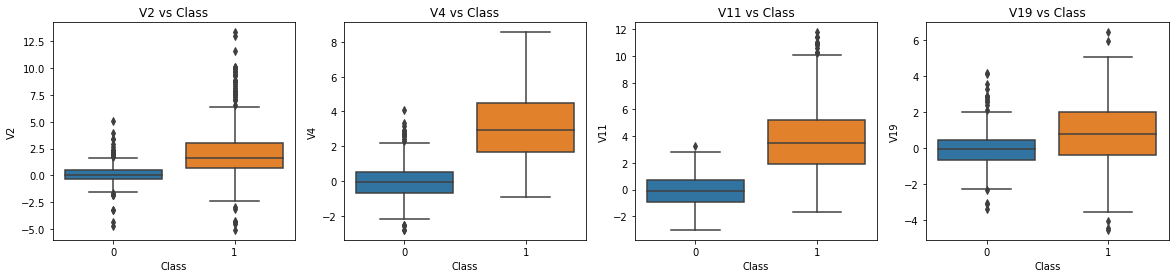

In [107]:
normal_fraud_trans = pd.concat([normal_transactions, fraud_transactions])
selected_features_pos=["V2","V4","V11","V19"]
selected_features_neg=["V10","V12","V14","V16","V17"]
f,axes=plt.subplots(figsize=(20,4),ncols=4)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V2"],ax=axes[0])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V4"],ax=axes[1])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V11"],ax=axes[2])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V19"],ax=axes[3])
axes[0].set_title("V2 vs Class")
axes[1].set_title("V4 vs Class")
axes[2].set_title("V11 vs Class")
axes[3].set_title("V19 vs Class")
plt.show()






Text(0.5, 1.0, 'V17 vs Class')

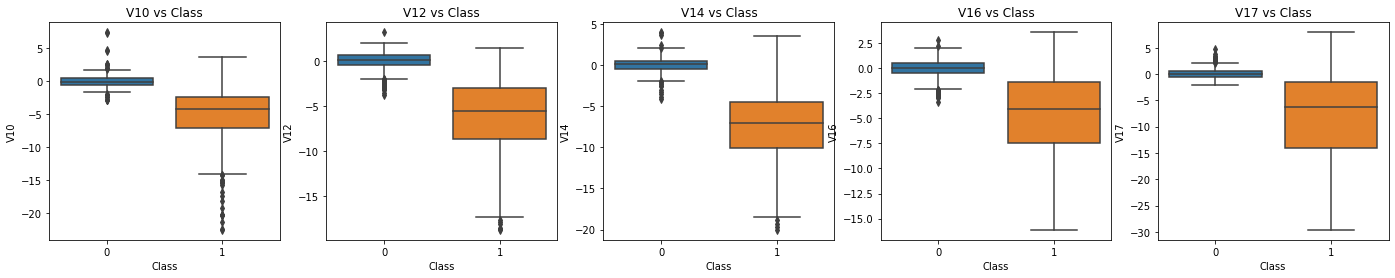

In [120]:
f,axes=plt.subplots(figsize=(24,4),ncols=5)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V10"],ax=axes[0])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V12"],ax=axes[1])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V14"],ax=axes[2])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V16"],ax=axes[3])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V17"],ax=axes[4])
axes[0].set_title("V10 vs Class")
axes[1].set_title("V12 vs Class")
axes[2].set_title("V14 vs Class")
axes[3].set_title("V16 vs Class")
axes[4].set_title("V17 vs Class")


Because some values are "outliers," they must be removed, and the boxplot must be repeated to re-analyze the values obtained.
The features where these values essentially exist are in V2, V19 and V10

In [116]:
def outlier_removal(data,feature, value):
    array = data[feature].loc[data['Class'] == value].values 
    q1, q3 = np.percentile(array, 25), np.percentile(array,75)
    iqr = q3 - q1
    cutoff = iqr*1.5
    lower_threshold = q1 - cutoff
    upper_threshold = q3 + cutoff
    outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
    df = data.drop(data[(data[feature] > upper_threshold) | (data[feature] < lower_threshold)].index)
    return df

Text(0.5, 1.0, 'V2 vs Class OUTLIER')

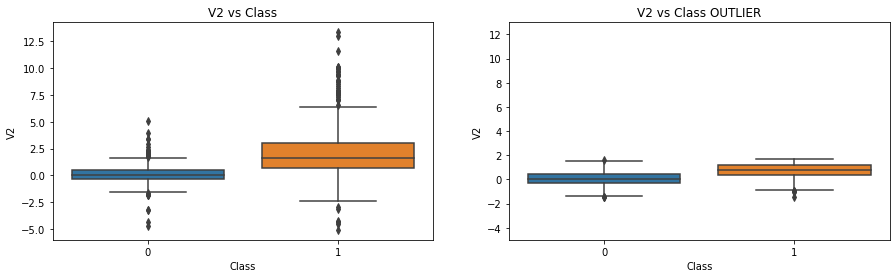

In [135]:
data_outlier_feature_V2=outlier_removal(normal_fraud_trans,"V2",1)
data_outlier_feature_V2=outlier_removal(data_outlier_feature_V2,"V2",0)
f,axes=plt.subplots(figsize=(15,4),ncols=2)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V2"],ax=axes[0])
sns.boxplot(x=data_outlier_feature_V2["Class"],y=data_outlier_feature_V2["V2"],ax=axes[1])
plt.ylim(-5,13)
axes[0].set_title("V2 vs Class")
axes[1].set_title("V2 vs Class OUTLIER")

Text(0.5, 1.0, 'V19 vs Class OUTLIER')

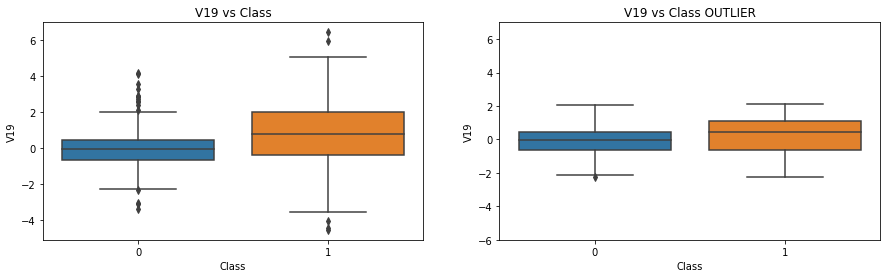

In [133]:
data_outlier_feature_V19=outlier_removal(normal_fraud_trans,"V19",1)
data_outlier_feature_V19=outlier_removal(data_outlier_feature_V19,"V19",0)

f,axes=plt.subplots(figsize=(15,4),ncols=2)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V19"],ax=axes[0])
sns.boxplot(x=data_outlier_feature_V2["Class"],y=data_outlier_feature_V19["V19"],ax=axes[1])
plt.ylim(-6,7)
axes[0].set_title("V19 vs Class")
axes[1].set_title("V19 vs Class OUTLIER")

Text(0.5, 1.0, 'V10 vs Class OUTLIER')

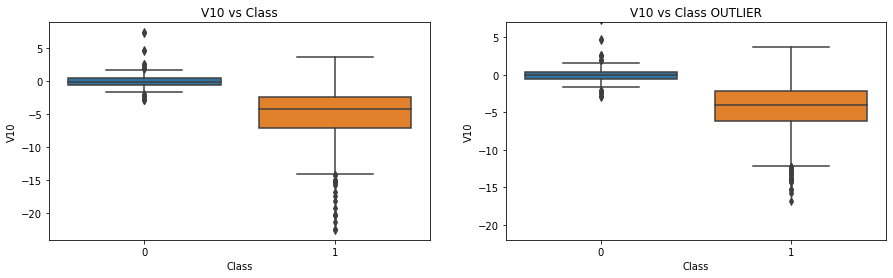

In [131]:
data_outlier_feature_V10=outlier_removal(normal_fraud_trans,"V10",1)
data_outlier_feature_V10=outlier_removal(data_outlier_feature_V10,"V10",0)
f,axes=plt.subplots(figsize=(15,4),ncols=2)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V10"],ax=axes[0])
sns.boxplot(x=data_outlier_feature_V2["Class"],y=data_outlier_feature_V19["V10"],ax=axes[1])
plt.ylim(-22,7)
axes[0].set_title("V10 vs Class")
axes[1].set_title("V10 vs Class OUTLIER")